# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

from importlib import reload
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

We recommend the use of scanpy Anndata objects as the preferred mode of loading and filtering data.

A sample dataset is provided and can be accessed using the ```load_data()``` method

In [3]:
from SEACells.utils import load_data

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [4]:
ad = load_data()

# Pre-processing

The following section describes basic pre-processing steps for scRNA-seq. For scATAC-seq, we provide a pipeline for pre-processing in  in example notebook `preprocessing-ATAC.ipynb`

In [5]:
# First we remove any genes which have counts for fewer than 5 cells
non_zero_entries =  np.count_nonzero(ad.to_df(), axis=0)
keep_genes = ad.var_names[non_zero_entries>=5]
ad = ad[:, keep_genes]

# We drop any cells with zero expression as well
keep_cells = ad.obs_names[ad.to_df().sum(1) > 0]
ad = ad[keep_cells, :]

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
# We now generate principal components, which will be later used to run Metacells.
# 

# Normalize cells and compute highly variable genes
sc.pp.normalize_per_cell(ad)
sc.pp.highly_variable_genes(ad)

# Compute principal components - 
# Here we use 50 components. This number may also be selected by examining variance explaint
sc.tl.pca(ad, n_comps=50, use_highly_variable=True)

Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


# Running SEACells

In [7]:
## User defined parameters

## Core parameters 
n_SEACells = 10
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells
waypoint_proportion = 1 # Proportion of metacells to initialize using waypoint analysis, 
                        # the remainder of cells are selected by greedy selection




In [9]:
from SEACells.core import SEACells


model = SEACells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

model.fit(n_iter=100)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Building kernel...
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


[autoreload of SEACells.core failed: Traceback (most recent call last):
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.


Making graph symmetric...
Computing RBF kernel...



Building similarity LIL matrix...



Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 9 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...



Selecting 1 cells from greedy initialization.
Randomly initialized A matrix.
Setting convergence threshold at 0.004718979160237015
Starting iteration 1.
Completed iteration 1.
Contains 10 SEACells after 1 iterations.
Contains 10 SEACells after 2 iterations.
Contains 10 SEACells after 3 iterations.
Contains 10 SEACells after 4 iterations.
Contains 10 SEACells after 5 iterations.
Contains 10 SEACells after 6 iterations.
Contains 10 SEACells after 7 iterations.
Contains 10 SEACells after 8 iterations.
Contains 10 SEACells after 9 iterations.
Starting iteration 10.
Completed iteration 10.
Contains 10 SEACells after 10 iterations.
Contains 10 SEACells after 11 iterations.
Contains 10 SEACells after 12 iterations.
Contains 10 SEACells after 13 iterations.
Contains 10 SEACells after 14 iterations.
Contains 10 SEACells after 15 iterations.
Contains 10 SEACells after 16 iterations.
Contains 10 SEACells after 17 iterations.
Contains 10 SEACells after 18 iterations.
Contains 10 SEACells after 19

# Accessing results

### Model Parameters

The SEACells model oject has the following attributes

### Model Convergence

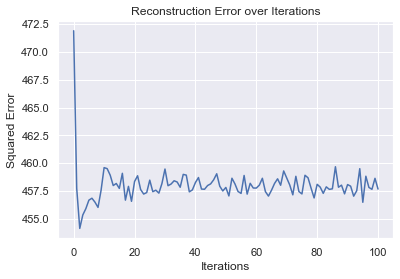

In [10]:
%matplotlib inline
# Check for convergence 
model.plot_convergence()

### SEACell Assignments

These can be accessed as folows:
- in the modified anndata object in `.obs['SEAell']`
- from the model using `.get_assignments()`


In [14]:
ad.obs[['SEACell']].head()

,SEACell
index,
cd34_multiome_rep1#AAACAGCCACTCGCTC-1,cd34_multiome_rep1#AATCCCTGTCAAGTAT-1
cd34_multiome_rep1#AAACAGCCACTGACCG-1,cd34_multiome_rep1#AAAGCGGGTATTCGCT-1
cd34_multiome_rep1#AAACAGCCATAATCAC-1,cd34_multiome_rep1#ACAACAGAGTGGACAA-1
cd34_multiome_rep1#AAACATGCAAATTCGT-1,cd34_multiome_rep1#ACAACAGAGTGGACAA-1
cd34_multiome_rep1#AAACATGCAGCATGTC-1,cd34_multiome_rep1#AATGAAGGTAGCTGGT-1


In [15]:
model.get_assignments().head()

,SEACell
index,
cd34_multiome_rep1#AAACAGCCACTCGCTC-1,cd34_multiome_rep1#AATCCCTGTCAAGTAT-1
cd34_multiome_rep1#AAACAGCCACTGACCG-1,cd34_multiome_rep1#AAAGCGGGTATTCGCT-1
cd34_multiome_rep1#AAACAGCCATAATCAC-1,cd34_multiome_rep1#ACAACAGAGTGGACAA-1
cd34_multiome_rep1#AAACATGCAAATTCGT-1,cd34_multiome_rep1#ACAACAGAGTGGACAA-1
cd34_multiome_rep1#AAACATGCAGCATGTC-1,cd34_multiome_rep1#AATGAAGGTAGCTGGT-1


# Summarizing data

- `.summarize_by_metacell()`

Datasets can be summarized by metacell by aggregating cells within each metacell - either averaging or summing over all raw data for all cells belonging to a metacell. The output of this function is an anndata object of shape n_metacells x original_data_dimension 



In [ ]:
metacell_ad = model.summarize_by_metacell(aggregate_by='sum')
metacell_ad

# Evaluating Results

We provide several methods for evaluating metacell assignments:

## 1.Visualizing Results

Metacells also implements methods for visualizing the results of the Metacells algorithm 
    <ul> 
        <li>```.plot_2D()``` provides an interface for viewing metacell assignments on any 2-dimensional embedding in ad.obsm. Plots can also be coloured by metacell assignment.
        <li>```.plot_metacell_sizes()``` can be used to view the distribution of number of cells assigned to each metacell
        <li>```.plot_assignment_entropy(ad)``` returns the entropy of assignment probabilities across metacells for each metacell. These values should ideally be low, indicating strong memmbership within a metacell. This function also optionally plots the entropy distribution.
    </ul>
    
            

In [ ]:
# Load the plotting functions as plot
from metacells import plot
sns.set(style="white")

In [ ]:
plot.plot_2D(ad, key='X_umap', colour_metacells=False)

In [ ]:
plot.plot_2D(ad, key = 'X_FDL', colour_metacells=True)

In [ ]:
plot.plot_metacell_sizes(ad, bins=5)

In [ ]:
plot.plot_assignment_entropy(ad)

In [ ]:
# This entropy can be visualized in 2D using standard scanpy plotting functions, as well
sc.pl.umap(ad, color='Metacell_Entropy',s=50)

## 2. Quantifying Results

Metacells also implements methods for visualizing the results of the Metacells algorithm 
    <ul> 
        <li>```.compute_within_metacell_entropy(ad, cluster, plot=True``` computes the entropy of different cluster labels within a Metacell. Typically, we use cluster='celltype' or similar, to visualize how well metacells represent subpopulations within a single cluster. This returns a pd.DataFrame of length n_metacells with the entropy of the distribution of cluster labels within each metacell.
        <li>```.get_metacell_compactness(ad, per_metacell=True, low_density_cells=False)``` computes the per-metacell average negative log-likelihood of cells being generated by their assigned metacell. Lower values of compactness suggest more compact/lower variance metacells. We can subset to only low density cells (computed as described in ```evaluate.get_density()```) to specific see performance in less dense regions or set per_metacell=False to see per-cell values.
        <li>```.get_metacell_separation(ad, nbr=k, per_metacell=True, low_density_cells=False)``` computes the (per-metacell average of) the difference in negative log-likelihood of cells being generated by their kth nearest-neighbor metacell and their assigned metacell. Higher values of separation suggest better distinction between metacells. We can subset to only low density cells (computed as described in ```evaluate.get_density()```) to specific see performance in less dense regions or set per_metacell=False to see per-cell values.
    </ul>
    


In [ ]:
from metacells import evaluate

sns.set(style='white')
%matplotlib inline

In [ ]:
within_mc_entropy = evaluate.compute_within_metacell_entropy(ad, 'celltype')
within_mc_entropy.head()

In [ ]:

plt.figure(figsize=(4,4))
sns.boxplot(data=within_mc_entropy, y='entropy')
plt.title('Within-Metacell Celltype Entropy')
sns.despine()
plt.show()
plt.close()

In [ ]:
import palantir 

neighbours, NLL_df = evaluate.get_NLLs(ad)
metacell_compactness = evaluate.get_compactness(ad, low_density_cells=False, per_metacell=True)


In [ ]:
metacell_compactness_low_density = evaluate.get_compactness(ad, low_density_cells=True, per_metacell=True)

In [ ]:
metacell_compactness['cells'] = 'all cells'
metacell_compactness_low_density['cells'] = 'low density'

compactness = pd.concat([metacell_compactness_low_density, metacell_compactness], axis=0)

plt.figure(figsize=(5,5))
sns.boxplot(data=compactness, x='cells', y='compactness')
sns.despine()
plt.title('Metacell Compactness')
plt.show()
plt.close()

In [ ]:
metacell_separation = evaluate.get_separation(ad, low_density_cells=False, per_metacell=True)


In [ ]:
metacell_separation_low_density = evaluate.get_separation(ad, low_density_cells=True, per_metacell=True)


In [ ]:
metacell_separation['cells'] = 'all cells'
metacell_separation_low_density['cells'] = 'low density'

separation = pd.concat([metacell_separation_low_density, metacell_separation], axis=0)

plt.figure(figsize=(5,5))
sns.boxplot(data=separation, x='cells', y='separation')
sns.despine()
plt.title('Metacell Separation')
plt.show()
plt.close()